In [7]:
import numpy
import pylab as plt

def CatmullRomSpline(P0, P1, P2, P3, nPoints=100):
  """
  P0, P1, P2, and P3 should be (x,y) point pairs that define the Catmull-Rom spline.
  nPoints is the number of points to include in this curve segment.
  """
  # Convert the points to numpy so that we can do array multiplication
  P0, P1, P2, P3 = map(numpy.array, [P0, P1, P2, P3])

  # Calculate t0 to t4
  alpha = 0.5
  def tj(ti, Pi, Pj):
    xi, yi = Pi
    xj, yj = Pj
    return ( ( (xj-xi)**2 + (yj-yi)**2 )**0.5 )**alpha + ti

  t0 = 0
  t1 = tj(t0, P0, P1)
  t2 = tj(t1, P1, P2)
  t3 = tj(t2, P2, P3)

  # Only calculate points between P1 and P2
  t = numpy.linspace(t1,t2,nPoints)
  print(t)
  # Reshape so that we can multiply by the points P0 to P3
  # and get a point for each value of t.
  t = t.reshape(len(t),1)
  print(t)
  A1 = (t1-t)/(t1-t0)*P0 + (t-t0)/(t1-t0)*P1
  A2 = (t2-t)/(t2-t1)*P1 + (t-t1)/(t2-t1)*P2
  A3 = (t3-t)/(t3-t2)*P2 + (t-t2)/(t3-t2)*P3

  B1 = (t2-t)/(t2-t0)*A1 + (t-t0)/(t2-t0)*A2
  B2 = (t3-t)/(t3-t1)*A2 + (t-t1)/(t3-t1)*A3

  C  = (t2-t)/(t2-t1)*B1 + (t-t1)/(t2-t1)*B2
  return C

[ 1.43581086  1.44782305  1.45983524  1.47184743  1.48385963  1.49587182
  1.50788401  1.51989621  1.5319084   1.54392059  1.55593279  1.56794498
  1.57995717  1.59196937  1.60398156  1.61599375  1.62800594  1.64001814
  1.65203033  1.66404252  1.67605472  1.68806691  1.7000791   1.7120913
  1.72410349  1.73611568  1.74812788  1.76014007  1.77215226  1.78416445
  1.79617665  1.80818884  1.82020103  1.83221323  1.84422542  1.85623761
  1.86824981  1.880262    1.89227419  1.90428639  1.91629858  1.92831077
  1.94032296  1.95233516  1.96434735  1.97635954  1.98837174  2.00038393
  2.01239612  2.02440832  2.03642051  2.0484327   2.0604449   2.07245709
  2.08446928  2.09648147  2.10849367  2.12050586  2.13251805  2.14453025
  2.15654244  2.16855463  2.18056683  2.19257902  2.20459121  2.21660341
  2.2286156   2.24062779  2.25263999  2.26465218  2.27666437  2.28867656
  2.30068876  2.31270095  2.32471314  2.33672534  2.34873753  2.36074972
  2.37276192  2.38477411  2.3967863   2.4087985   2.

 [ 3.88954215]]


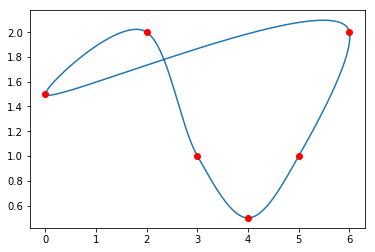

In [8]:



def CatmullRomChain(P):
  """
  Calculate Catmull Rom for a chain of points and return the combined curve.
  """
  sz = len(P)

  # The curve C will contain an array of (x,y) points.
  C = []
  for i in range(sz-3):
    c = CatmullRomSpline(P[i], P[i+1], P[i+2], P[i+3])
    C.extend(c)

  a = CatmullRomSpline(P[3],P[4],P[5],P[0])
  b = CatmullRomSpline(P[4],P[5],P[0],P[1])
  d = CatmullRomSpline(P[5],P[0],P[1],P[2])
  C.extend(a)
  C.extend(b)
  C.extend(d)

  return C

# Define a set of points for curve to go through
Points = [[0,1.5],[2,2],[3,1],[4,0.5],[5,1],[6,2]]

# Calculate the Catmull-Rom splines through the points
c = CatmullRomChain(Points)

# Convert the Catmull-Rom curve points into x and y arrays and plot
x,y = zip(*c)
plt.plot(x,y)

# Plot the control points
px, py = zip(*Points)
plt.plot(px,py,'or')

plt.show()